## Test patching code to find bugs and edge cases: outdated (go to section 2)

This uses Ryan's patching code from week 4 (and eventually its updates by the coding team) to create patches on annotated slices

Tested on pre-annotated and extracted slices by Thinkers group, found in `/testing_slices` directory

In [18]:
import nbimporter
from Contour_Normal_Gridding import normal_squares_from_contour

ModuleNotFoundError: No module named 'Contour_Normal_Gridding'

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [13]:
# get binary image from original image file (white background)
def get_binary_image(image_path):
    """
    Reads an image from the given path, converts it to grayscale,
    and returns a binary thresholded image.

    Parameters:
        image_path (str): Path to the input image.

    Returns:
        np.ndarray: Binary (thresholded) image.
    """
    # Read the image
    image = cv2.imread(image_path)

    # Check if the image was successfully loaded
    if image is None:
        raise FileNotFoundError(f"Image not found at {image_path}")
    
    # Convert to grayscale
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply binary threshold
    _, whole_thresh = cv2.threshold(image_gray, 1, 255, cv2.THRESH_BINARY) 
    
    return image, whole_thresh

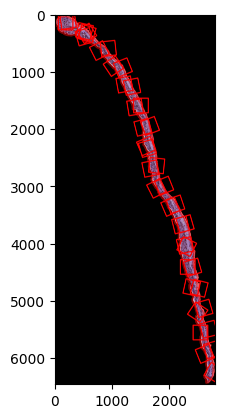

In [14]:
# test on long skinny slice
img_path = './testing_slices/h2114157_h&e_ROI_1 Epithelia.png'
img, img_binary = get_binary_image(img_path)

result_image, contour, squares = normal_squares_from_contour(
    img, 
    img_binary,
    square_size = 256,
    step = 10,
    overlap_thresh = 0.02,
    smoothing_size = 2
)

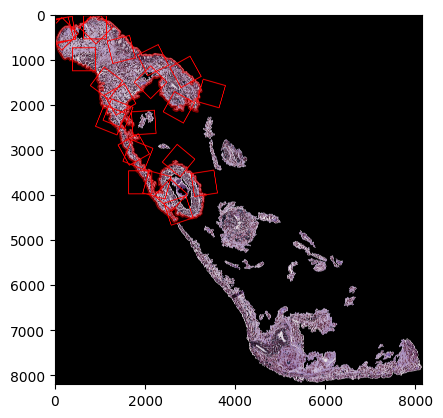

In [19]:
# test on thicker slice, bigger patches
img_path = './testing_slices/h2114155_h&e_ROI_3 Epithelia.png'
img, img_binary = get_binary_image(img_path)

result_image, contour, squares = normal_squares_from_contour(
    img, 
    img_binary,
    square_size = 512,
    step = 10,
    overlap_thresh = 0.02,
    smoothing_size = 2
)

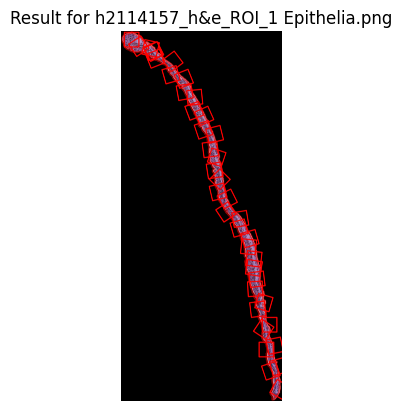

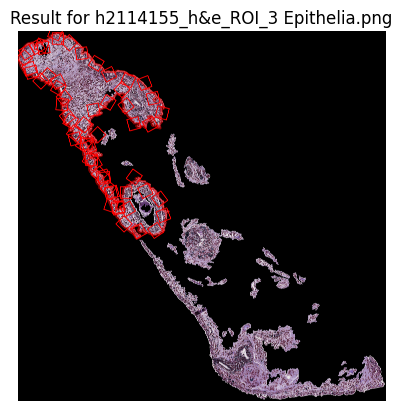

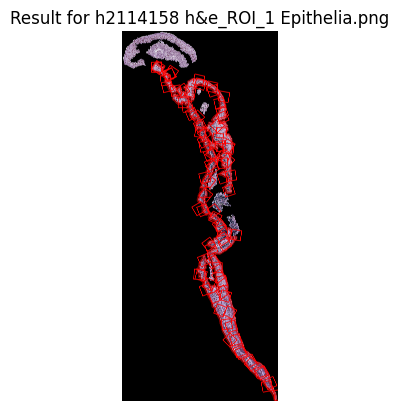

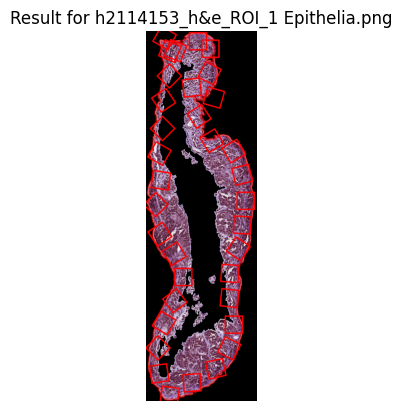

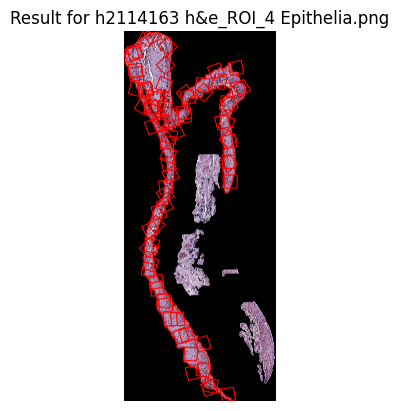

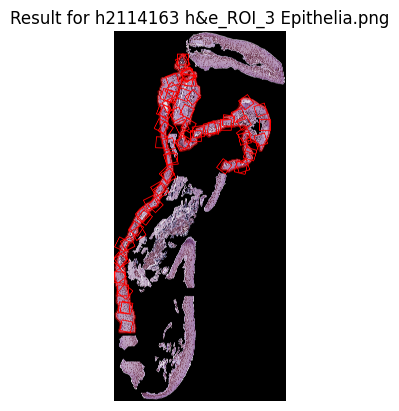

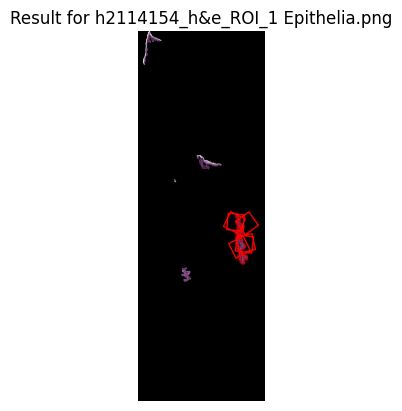

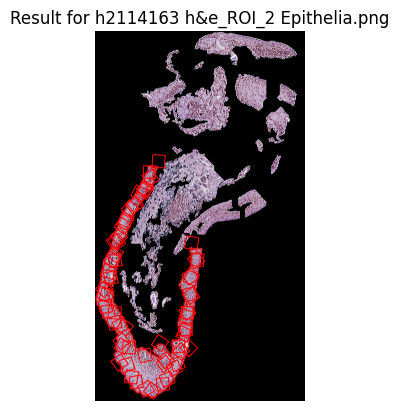

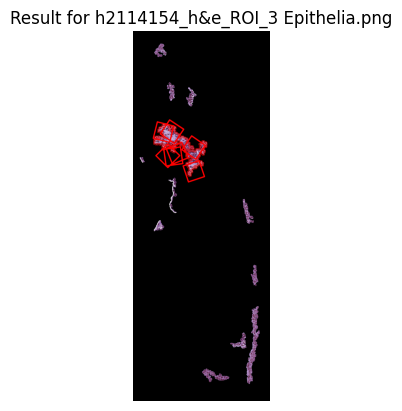

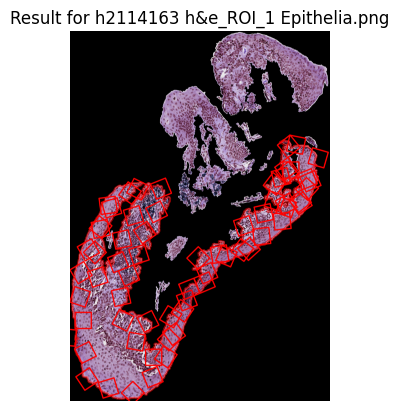

In [21]:
# test on testing_slices folder

# load images from testing directory
image_folder = './testing_slices'
image_files = [f for f in os.listdir(image_folder) if f.endswith('.png')]

# apply binary then patching to images
for img_file in image_files:

    img_path = os.path.join(image_folder, img_file)

    # convert to binary
    img, img_binary = get_binary_image(img_path)

    # apply patching
    result_image, contour, squares = normal_squares_from_contour(
     img,
     img_binary,
     square_size=256,
     step=5,
     overlap_thresh=0.01,
     smoothing_size=2
     )
    
    # plt.figure(figsize=(10, 5))
    # plt.imshow(result_image, cmap='gray')
    plt.title(f'Result for {img_file}')
    plt.axis('off')
    plt.show()
    plt.close()


## Test updated patching code: section 2

This uses Ryan, Hannah, and Sharon's toggleable patching code from week 5 to create patches on annotated slices

First test on non-annotated slices (original extracts), then add in class annotations

Uses a few randomly selected images from different stains in `/testing_slices` directory **from thinkers extractions**

In [1]:
import nbimporter
from Normal_Squares_Toggleable_ryan import process_contours

In [3]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

case_001_h&e_4


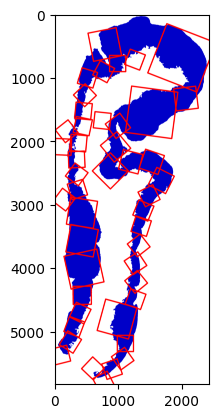

In [5]:
image1=cv2.imread("./testing_slices/case_001_h&e_4.png")
image1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
_,whole_thresh=cv2.threshold(image1_gray,200,255,cv2.THRESH_BINARY)#+cv2.THRESH_OTSU)
whole_thresh_inv=cv2.bitwise_not(whole_thresh)
whole_thresh=whole_thresh_inv
plt.imshow(whole_thresh_inv,cmap='gray')

print('case_001_h&e_4')
result_image3, contour3, squares3 = process_contours(
     image1,
     whole_thresh,
     square_size=256,
     step=10,
     overlap_thresh=0.1,
     smoothing_size=10,
     look_back=30,
     second_pass=True,
     variable_length=True)

## Function to convert image with white background to binary

In [6]:
def get_binary_white_bg (image_path):
    """
    Reads an image from the given path, converts it to grayscale,
    and returns a binary thresholded image.

    Parameters:
        image_path (str): Path to the input image.

    Returns:
        np.ndarray: Binary (thresholded) image.
    """
    # Read the image
    image=cv2.imread(image_path)

    # Check if the image was successfully loaded
    if image is None:
        raise FileNotFoundError(f"Image not found at {image_path}")
    
    # Convert to grayscale, apply binary threshold
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _,whole_thresh=cv2.threshold(image_gray,200,255,cv2.THRESH_BINARY)#+cv2.THRESH_OTSU)
    whole_thresh_inv=cv2.bitwise_not(whole_thresh)
    whole_thresh=whole_thresh_inv
    # plt.imshow(whole_thresh_inv,cmap='gray')
    
    return image, whole_thresh

## Function to show square patches

In [25]:
# extract and display squares
import matplotlib.pyplot as plt

def show_squares(image, squares_list):
    """Display extracted square images."""
    for i, square_group in enumerate(squares_list):
        for j, square in enumerate(square_group):  # Each contour might have multiple squares
            if len(square) == 4:  # Ensure it's a valid square
                x_min = int(np.min(square[:, 0]))
                x_max = int(np.max(square[:, 0]))
                y_min = int(np.min(square[:, 1]))
                y_max = int(np.max(square[:, 1]))

                # Extract the region from the image
                square_img = image[y_min:y_max, x_min:x_max]

                # Display the square
                plt.figure()
                plt.imshow(square_img)
                plt.title(f"Square {i}-{j}")
                plt.axis("off")
                plt.show()


## Test ryan's algorithm

case_002_h&e


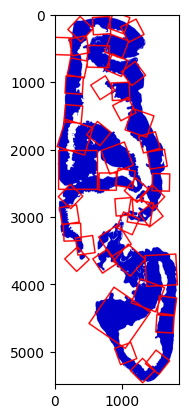

In [ ]:
image2, thresh2 = get_binary_white_bg("./testing_slices/case_002_h&e.png")

print('case_002_h&e')
result_image2, contour2, squares2 = process_contours(
     image2,
     thresh2,
     square_size=256,
     step=20,
     overlap_thresh=0.1,
     smoothing_size=15,
     look_back=40,
     second_pass=False,
     variable_length=True)

above: includes two widths of the epithelium in some places (top, bottom right, etc), otherwise works

increasing smoothing size from 10 to 20 makes the algorithm take several minutes, 15 works well

Case_004_h&e


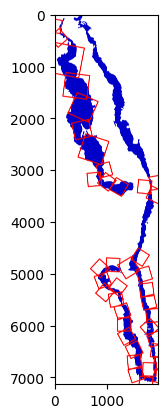

In [7]:
image3, thresh3 = get_binary_white_bg("./testing_slices/Case_004_h&e.png")

print('Case_004_h&e')
result_image3, contour3, squares3 = process_contours(
     image3,
     thresh3,
     square_size=256,
     step=10,
     overlap_thresh=0.1,
     smoothing_size=20,
     look_back=30,
     second_pass=True,
     variable_length=True)

smaller smoothing size for thinner epithelium

again, losing a lot of squares with second_pass = True but with second_pass = False there is too much overlap



Case_009_h&e


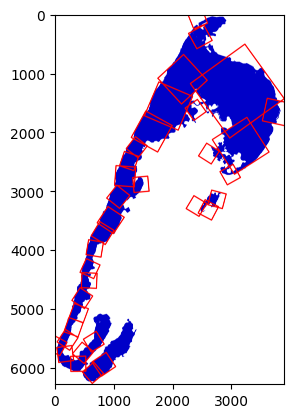

In [ ]:
image4, thresh4 = get_binary_white_bg("./testing_slices/Case_009_h&e.png")

print('Case_009_h&e')
result_image4, contour4, squares4 = process_contours(
     image4,
     thresh4,
     square_size=256,
     step=20,
     overlap_thresh=0.2,
     smoothing_size=10,
     look_back=30,
     second_pass=True,
     variable_length=True)

doesn't capture full width with second_pass but too much overlap without it

works for multiple branches (bottom left)

Case_053_h&e


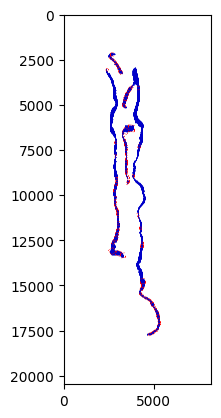

In [ ]:
image5, thresh5 = get_binary_white_bg("./testing_slices/Case_053_h&e.png")

print('Case_053_h&e')
result_image5, contour5, squares5 = process_contours(
     image5,
     thresh5,
     square_size=128,
     step=20,
     overlap_thresh=0.1,
     smoothing_size=20,
     look_back=20,
     second_pass=True,
     variable_length=True)

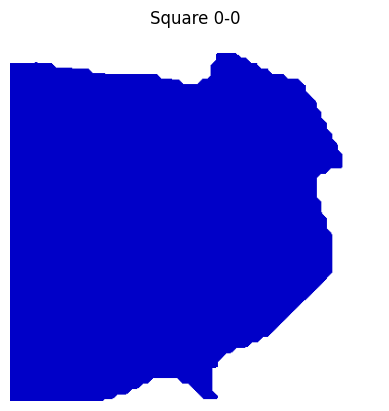

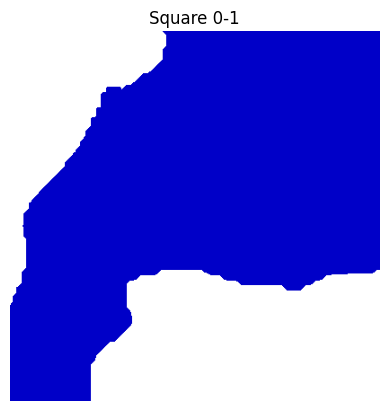

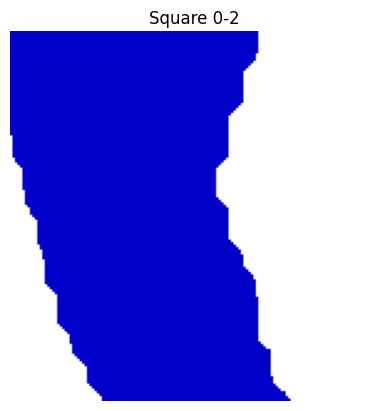

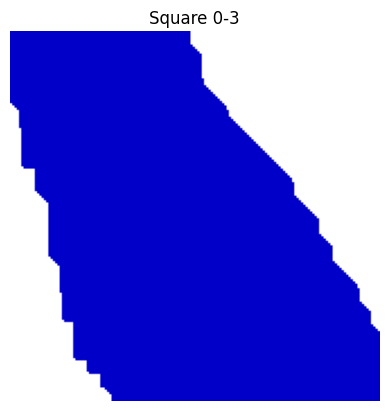

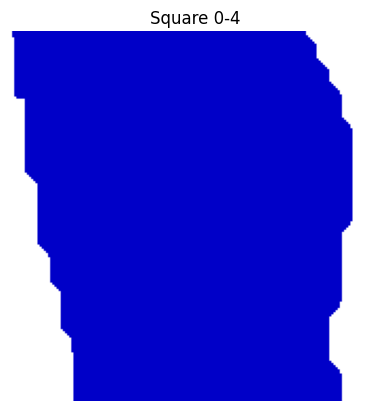

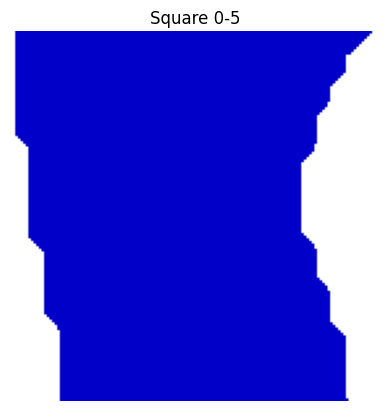

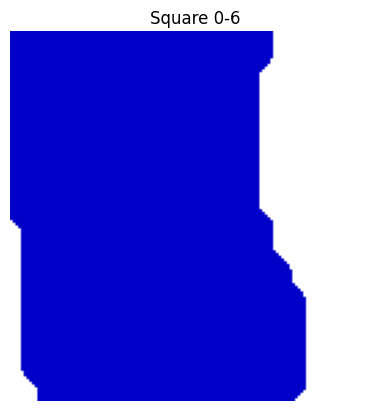

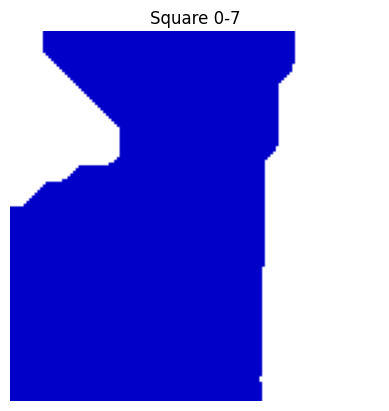

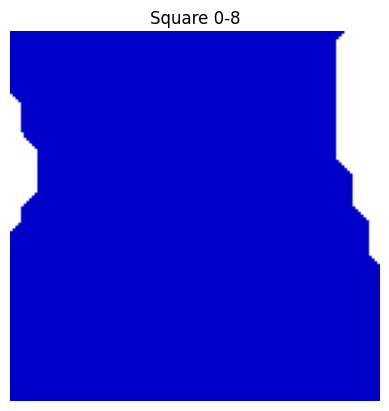

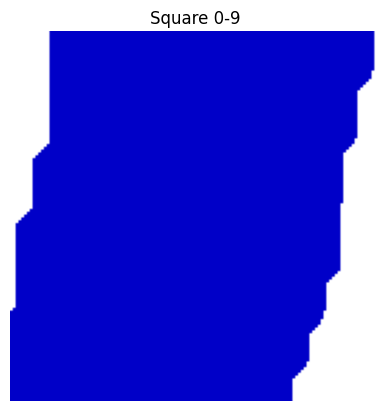

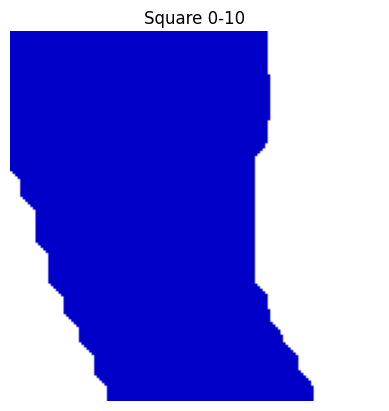

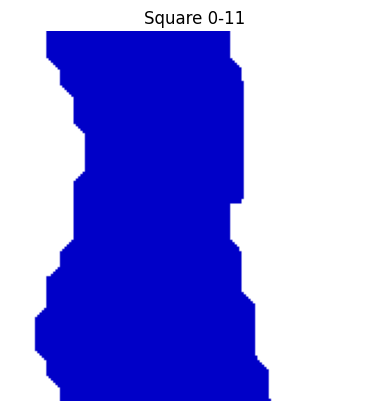

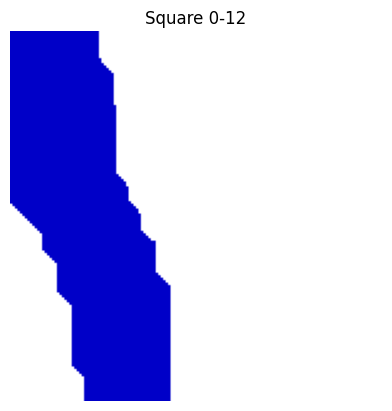

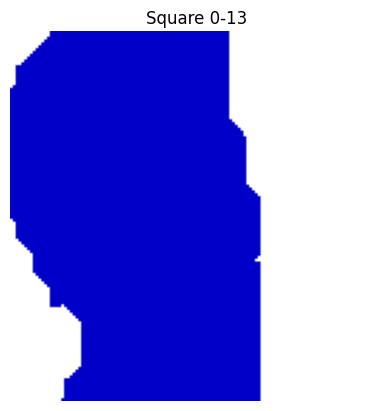

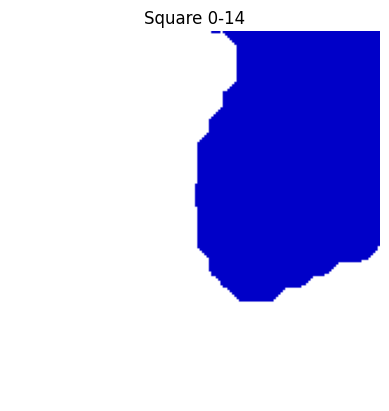

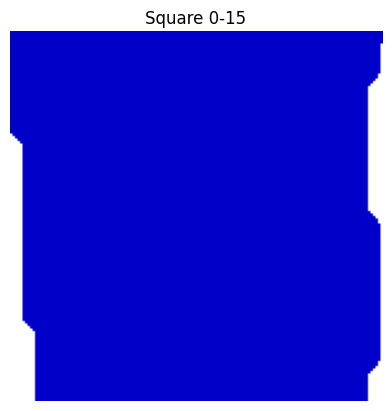

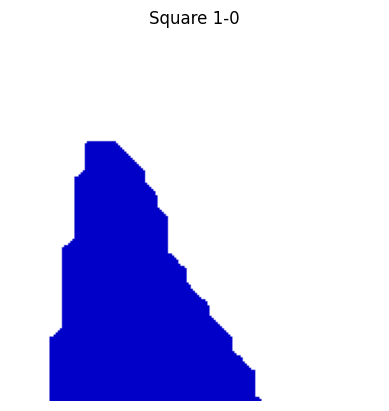

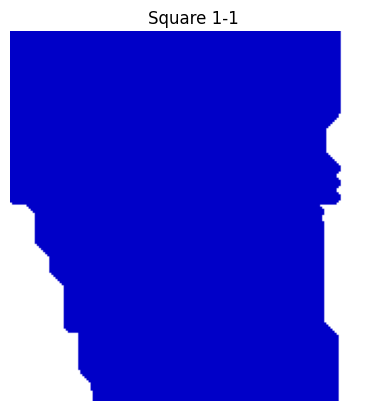

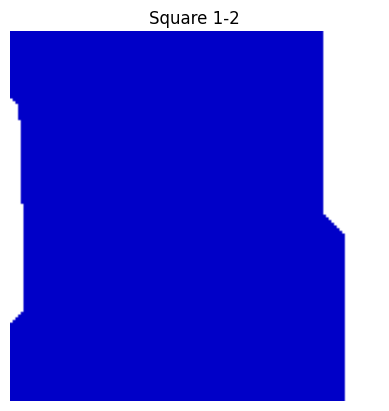

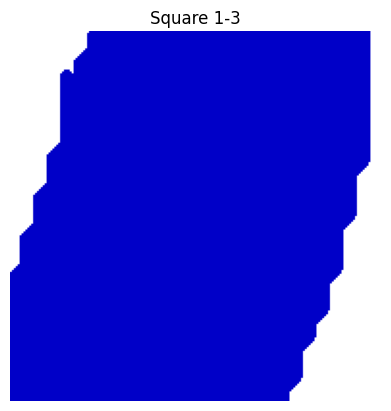

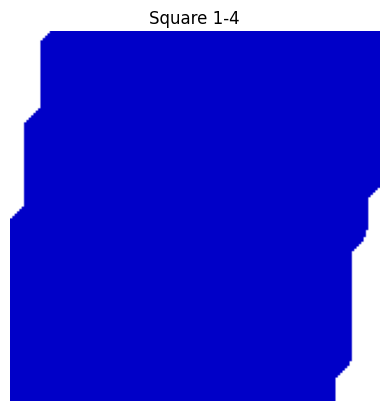

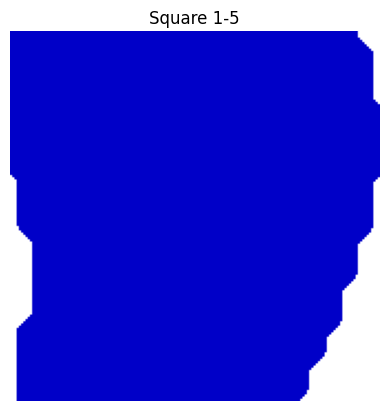

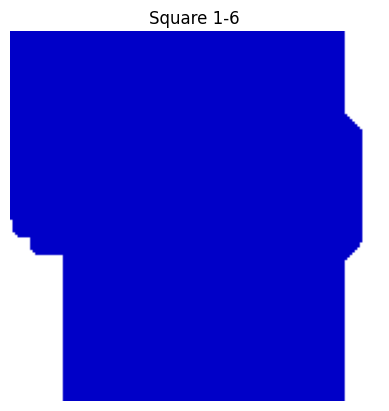

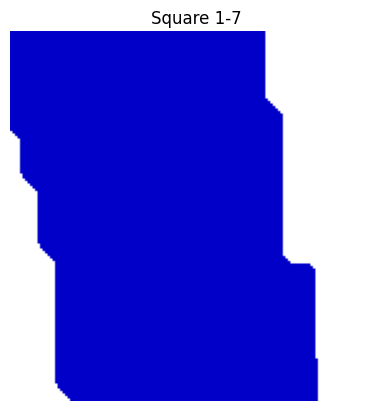

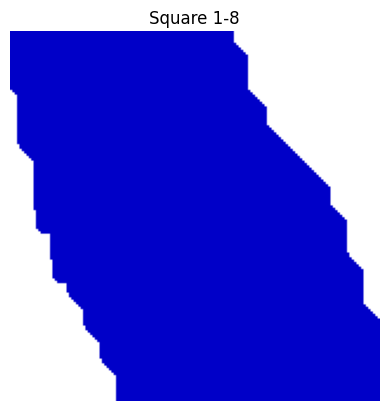

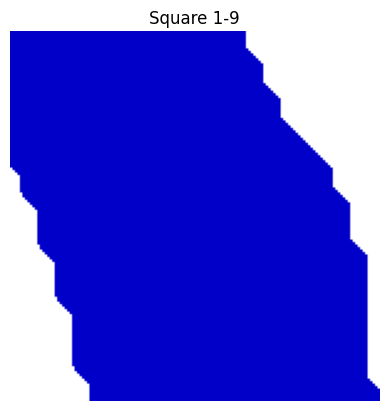

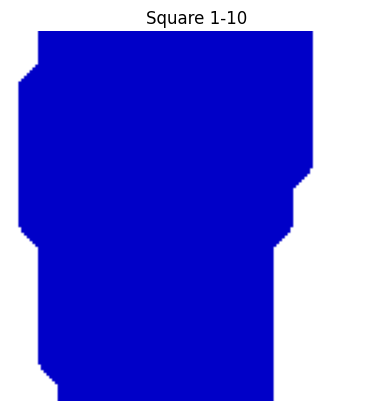

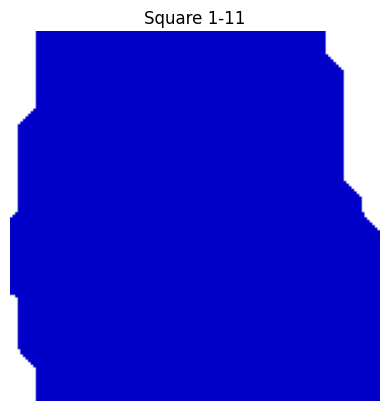

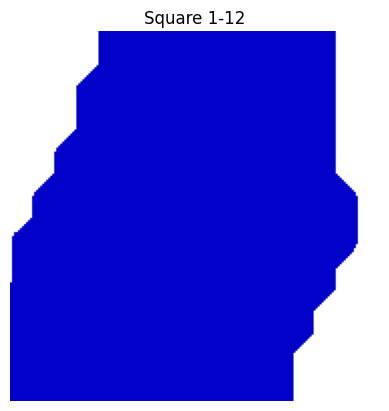

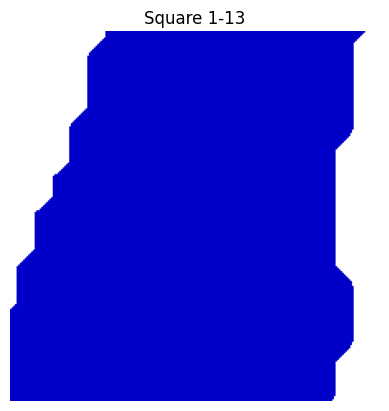

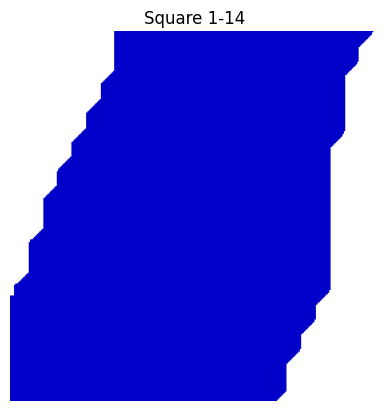

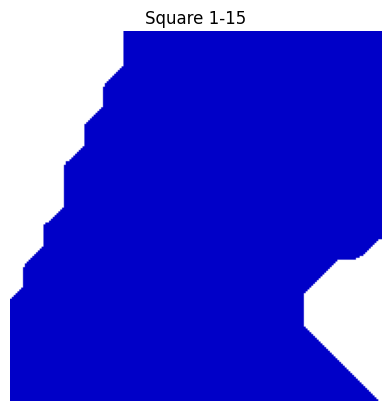

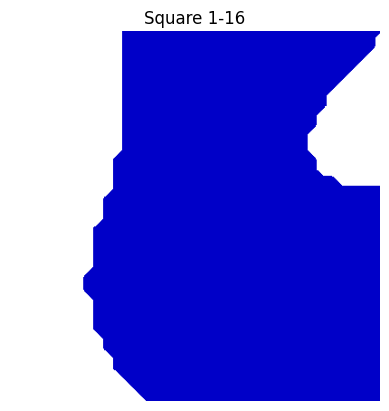

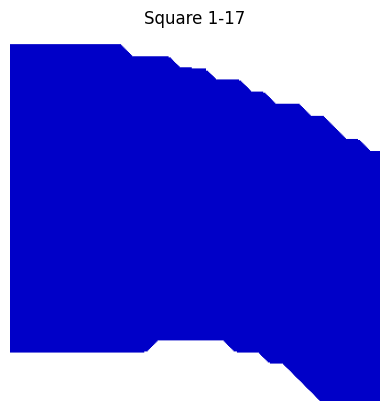

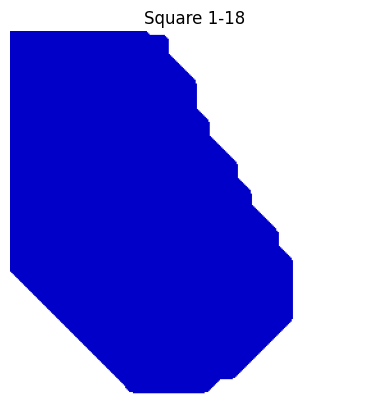

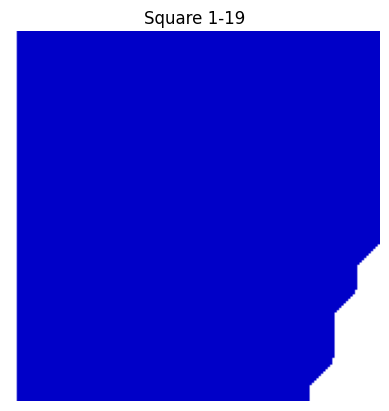

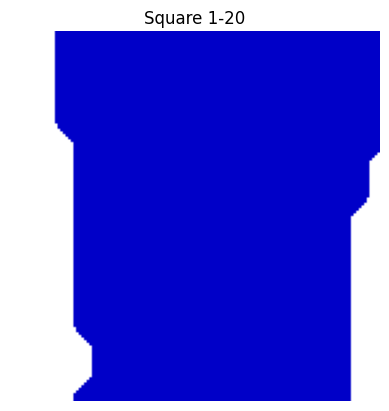

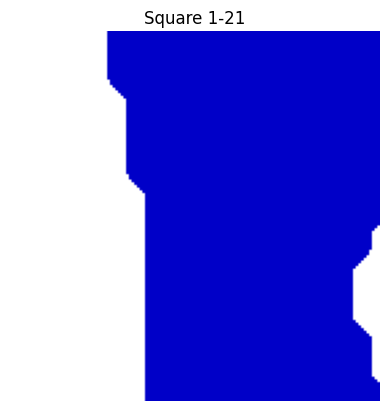

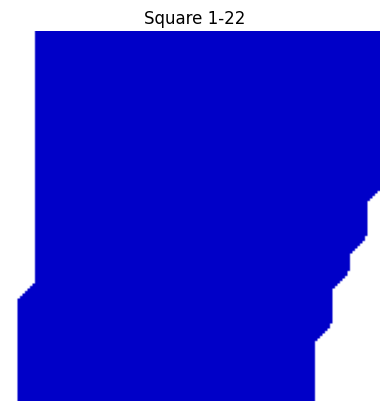

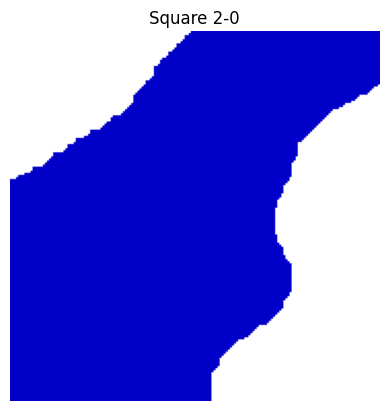

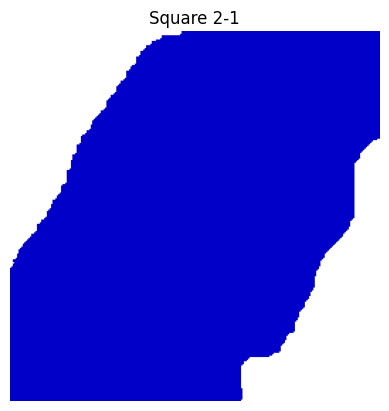

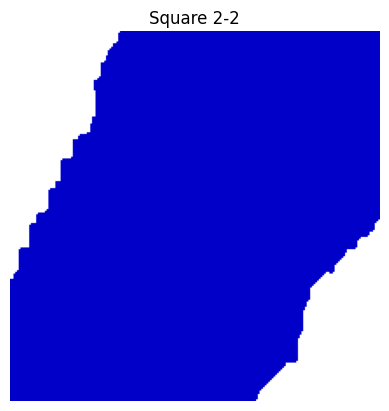

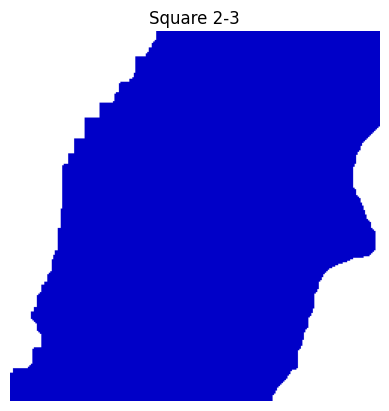

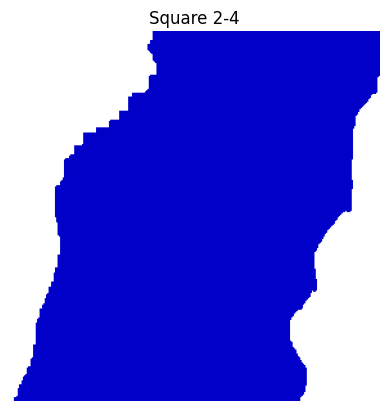

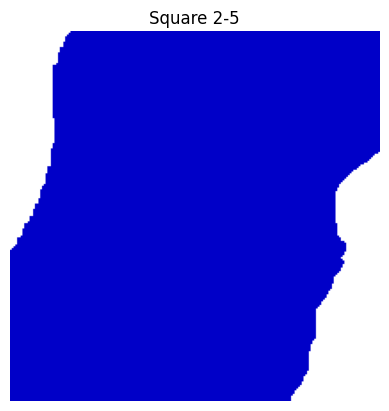

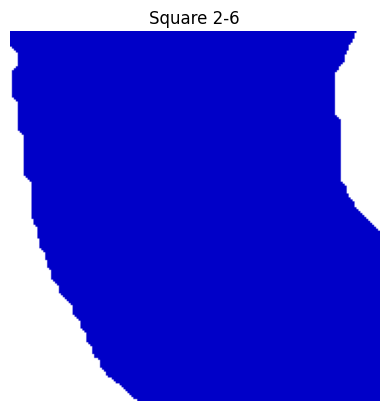

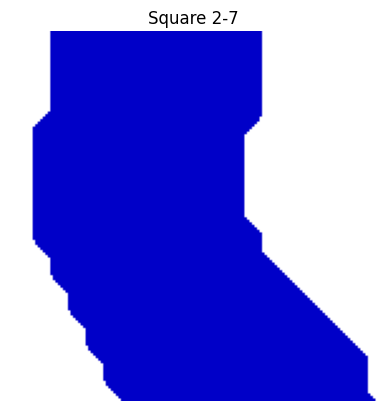

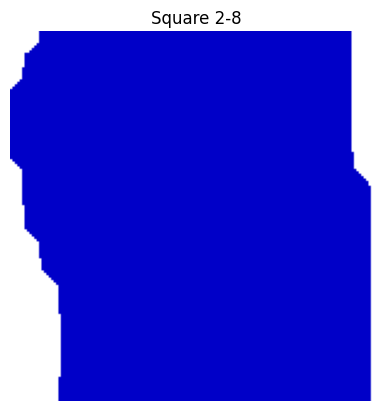

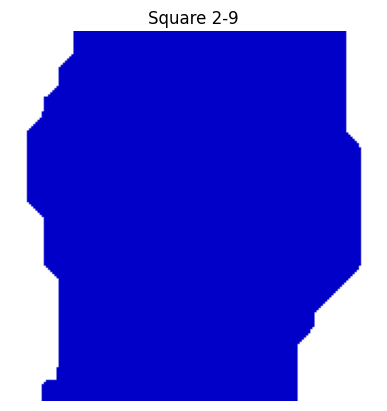

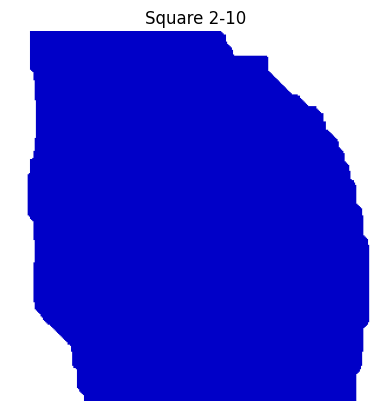

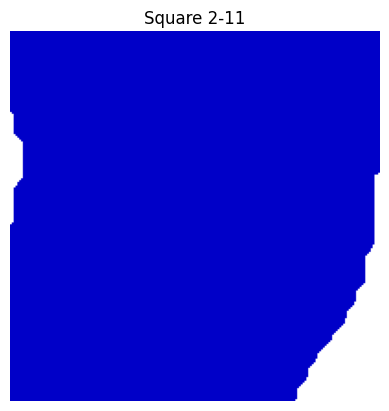

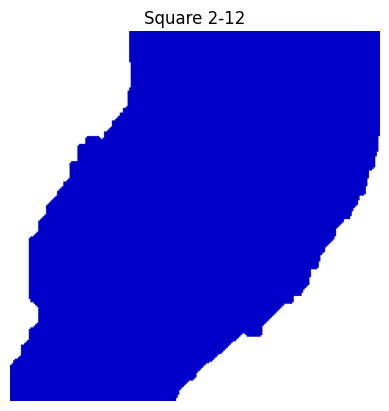

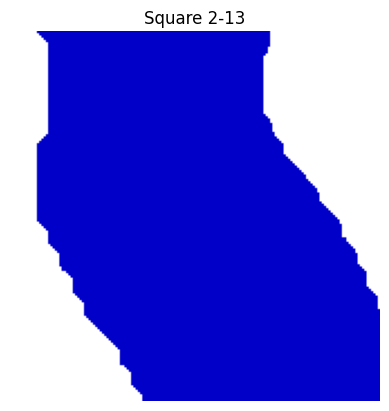

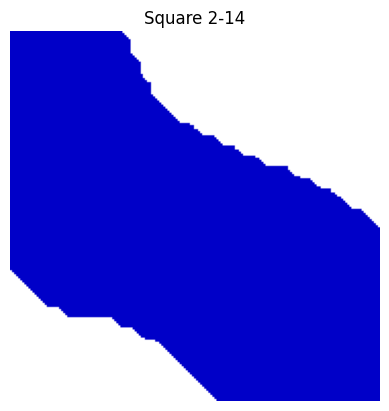

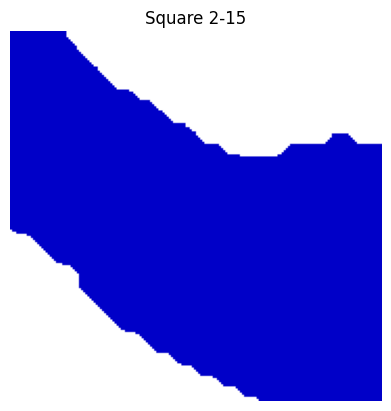

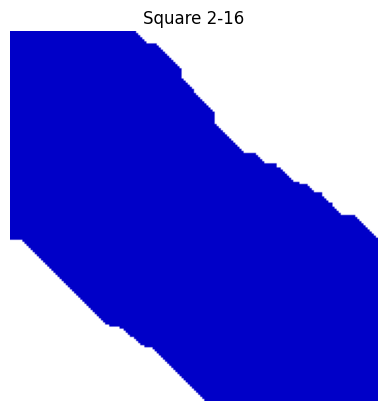

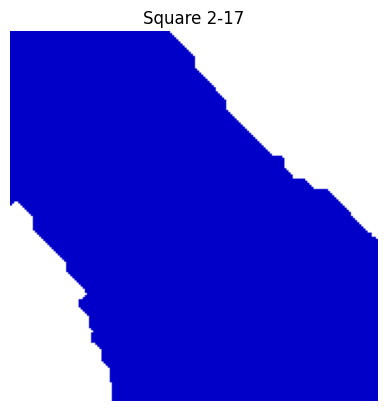

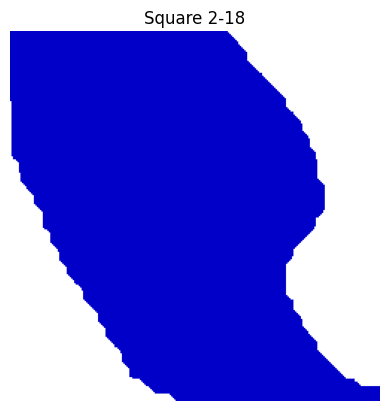

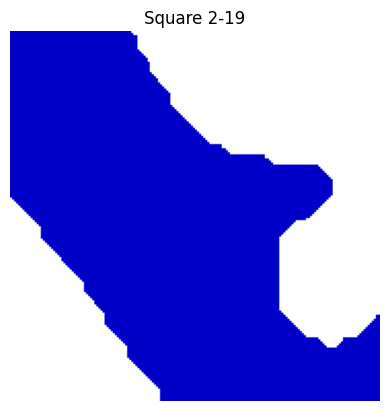

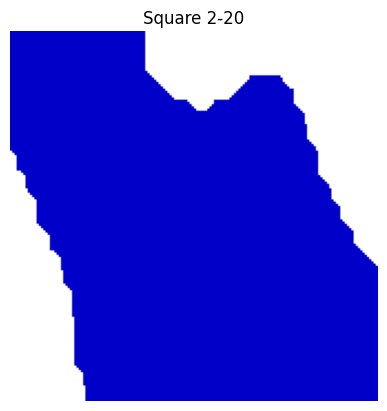

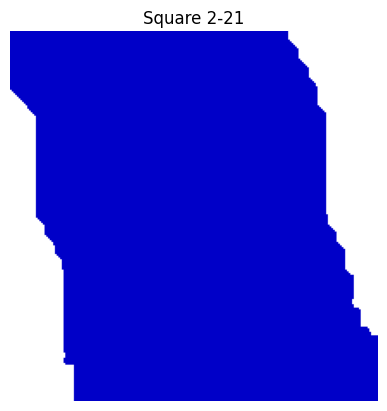

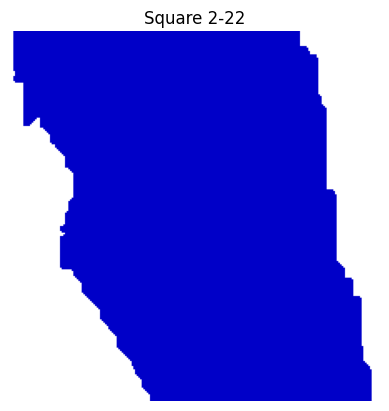

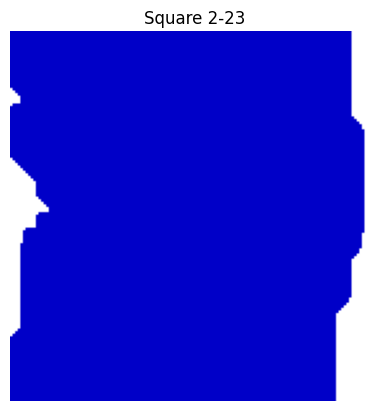

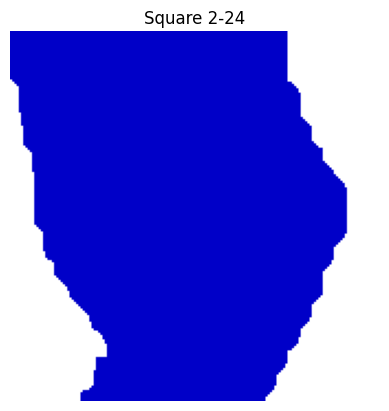

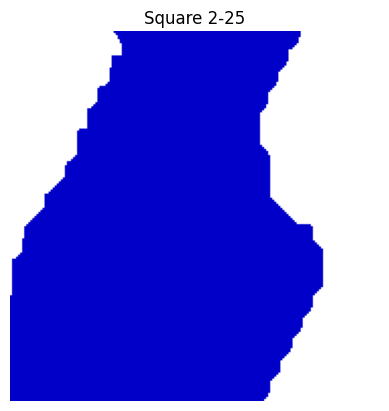

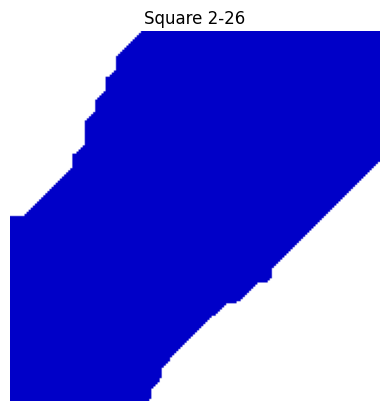

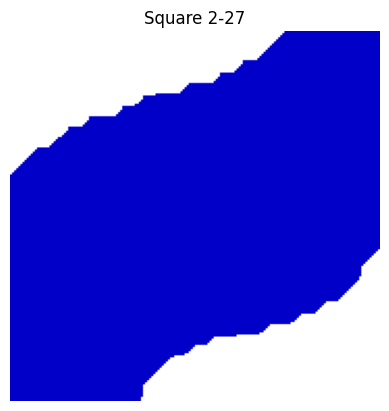

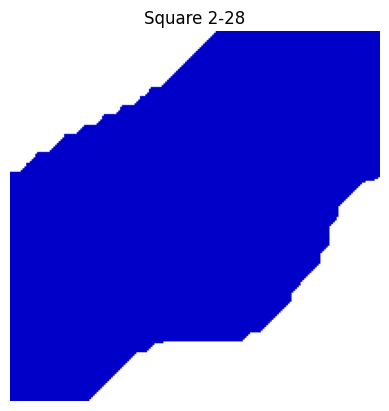

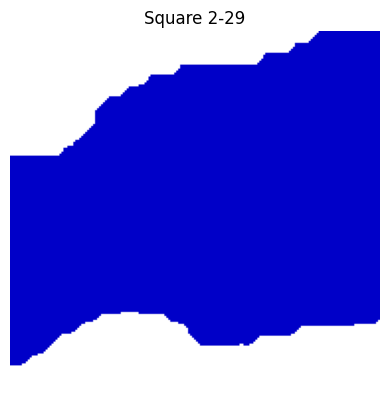

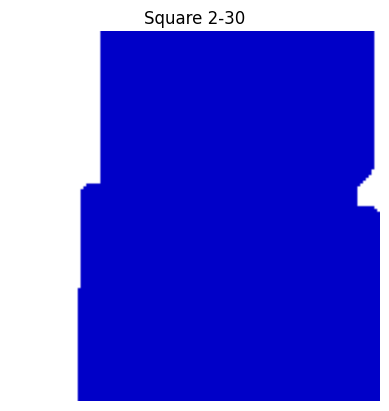

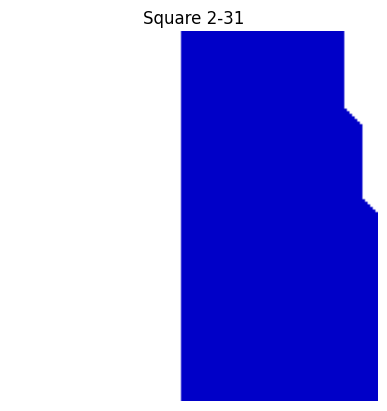

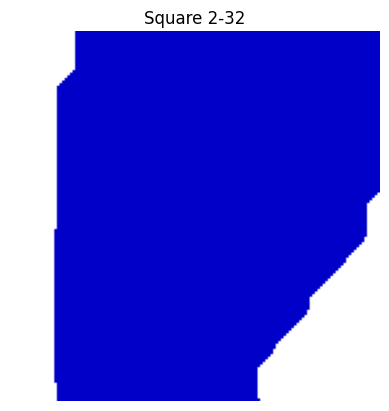

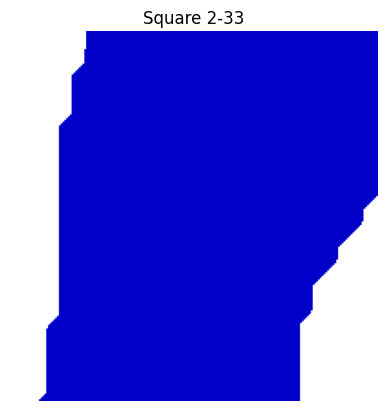

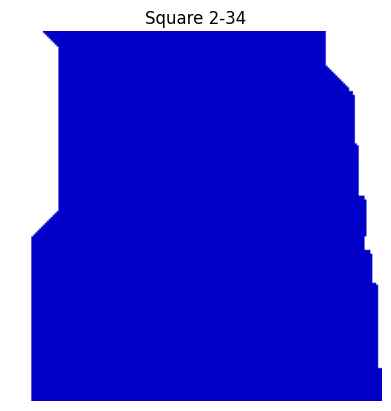

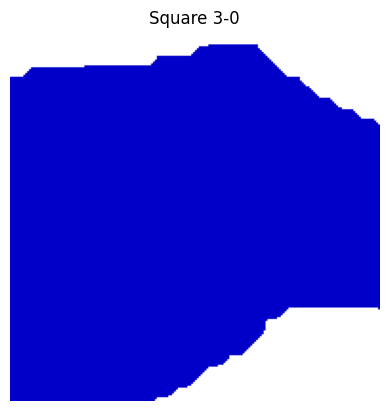

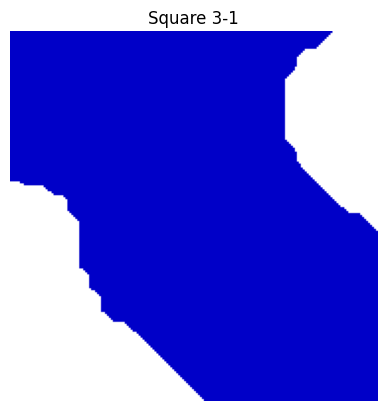

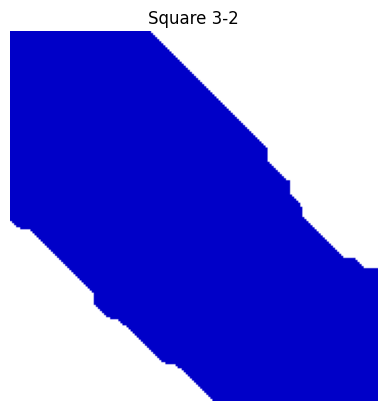

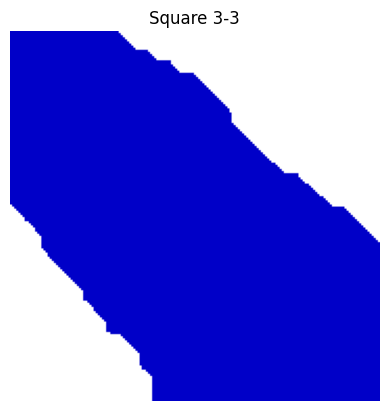

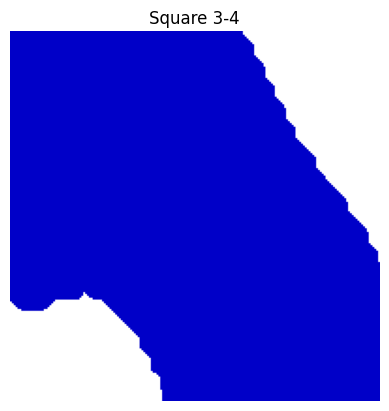

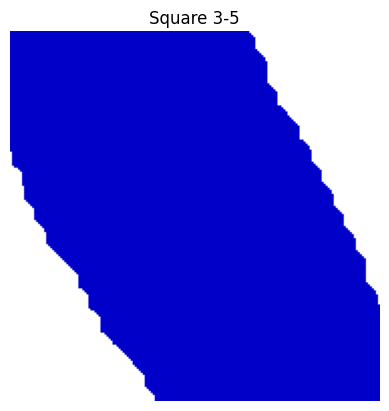

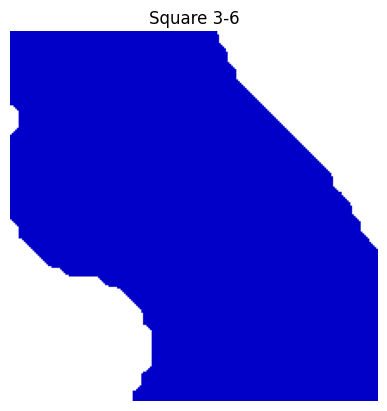

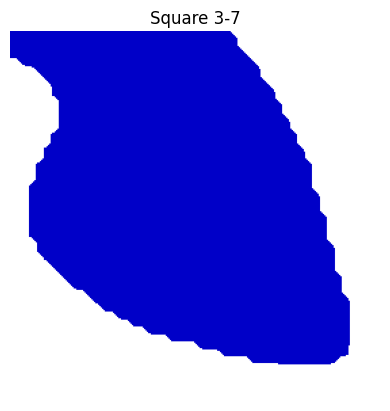

In [67]:
show_squares(image5, squares5)

works but seems like there is a lot of epithelium left unpatched

is there a function in `process_countours` that can determine how much epithelium is patched and keep going until we reach a certain threshold?

case_104_h&e


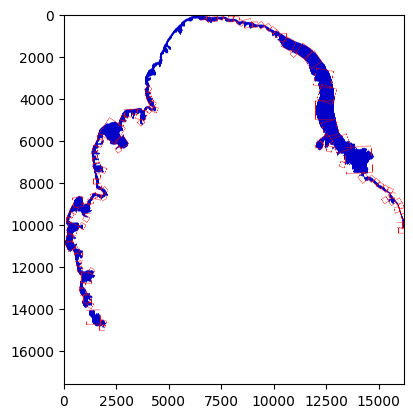

In [ ]:
image6, thresh6 = get_binary_white_bg("./testing_slices/case_104_h&e.png")

print('case_104_h&e')
result_image6, contour6, squares6 = process_contours(
     image6,
     thresh6,
     square_size=256,
     step=10,
     overlap_thresh=0.1,
     smoothing_size=10,
     look_back=50,
     second_pass=True,
     variable_length=True)

curvier/thinner epithelium needs higher lookback size, smaller step size

in what situation would you use variable_length = False?